<a href="https://colab.research.google.com/github/kingSSG/-SSG_WEB-/blob/main/hand%20Witten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand Written Digit Prediction - Classification Analysis

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each
image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

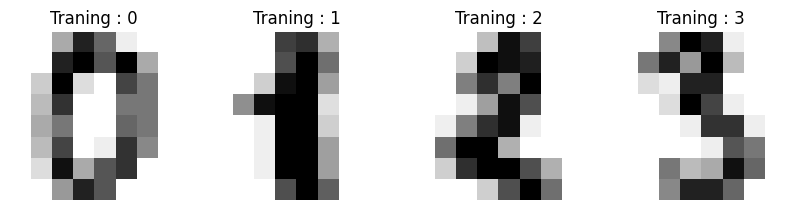

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap =plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Traning : %i"  % label)




In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape


(64,)

In [ ]:
data.shape

(1797, 64)

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)
X_train.shape, X_test.shape, y_train. shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([9, 2, 8, 6, 2, 3, 8, 2, 7, 1, 4, 0, 2, 6, 1, 1, 9, 7, 6, 7, 4, 6,
       7, 3, 0, 4, 8, 9, 5, 9, 5, 4, 9, 6, 8, 2, 4, 8, 9, 1, 4, 5, 2, 7,
       2, 6, 7, 2, 6, 6, 0, 2, 9, 6, 4, 9, 7, 6, 0, 9, 9, 6, 7, 8, 0, 6,
       3, 8, 6, 6, 1, 2, 0, 2, 1, 2, 0, 4, 6, 4, 0, 2, 5, 5, 3, 5, 1, 0,
       5, 7, 0, 8, 4, 7, 3, 9, 5, 4, 7, 0, 6, 6, 0, 4, 5, 0, 6, 1, 6, 8,
       2, 7, 2, 6, 9, 7, 4, 7, 3, 0, 4, 6, 2, 7, 0, 8, 3, 3, 2, 7, 7, 8,
       8, 4, 8, 9, 3, 5, 3, 1, 8, 1, 1, 2, 5, 2, 6, 2, 6, 9, 5, 1, 9, 1,
       5, 0, 7, 3, 2, 1, 5, 8, 0, 9, 5, 0, 1, 8, 8, 3, 8, 6, 3, 4, 1, 0,
       8, 5, 1, 5, 4, 9, 6, 9, 3, 8, 5, 1, 0, 1, 7, 6, 0, 9, 2, 4, 6, 6,
       7, 8, 1, 7, 3, 0, 7, 0, 8, 2, 7, 8, 8, 2, 1, 8, 0, 0, 9, 3, 0, 0,
       9, 2, 5, 3, 8, 6, 8, 2, 6, 2, 1, 6, 3, 8, 1, 7, 7, 5, 0, 4, 5, 5,
       4, 9, 5, 5, 8, 4, 3, 4, 5, 7, 1, 9, 4, 4, 0, 0, 2, 8, 2, 6, 5, 2,
       4, 7, 4, 9, 5, 9, 9, 4, 2, 0, 6, 0, 1, 3, 6, 9, 6, 7, 5, 8, 8, 9,
       7, 0, 7, 5, 7, 3, 7, 8, 3, 9, 3, 7, 6, 1, 3,

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 58,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 54,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  1,  2],
       [ 1,  0,  0,  0,  0,  1, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 47]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.98      1.00      0.99        57
           2       1.00      0.95      0.97        61
           3       0.98      0.94      0.96        47
           4       0.96      0.98      0.97        55
           5       0.98      0.94      0.96        53
           6       1.00      0.97      0.98        62
           7       0.96      1.00      0.98        54
           8       0.94      0.98      0.96        50
           9       0.94      0.98      0.96        48

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

